# This notebook creates clean data for the second cohort of ELS mice
* 2/3/2023 GT

In [ ]:
!git clone https://github.com/GergelyTuri/sleep.git
%cd sleep
!pip install .

Cloning into 'sleep'...
remote: Enumerating objects: 221, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 221 (delta 113), reused 148 (delta 53), pack-reused 0
Receiving objects: 100% (221/221), 1.07 MiB | 4.36 MiB/s, done.
Resolving deltas: 100% (113/113), done.
/content/sleep
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/sleep
  Preparing metadata (setup.py) ... done
  Created wheel for sleep: filename=sleep-0.1-py3-none-any.whl size=997 sha256=4eef646c50c8229c221de4f085b6d8301e2ff707e14effd2a13b61f5c34c7a65
  Stored in directory: /tmp/pip-ephem-wheel-cache-mrcwu1ej/wheels/10/eb/42/5281370ac4a2d7b033087761ebaa8f968a9ef5108cbc009a46
Successfully built sleep


In [ ]:
from pathlib import Path
from datetime import date

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('talk')

from sleep.base import core
%matplotlib inline

In [ ]:
core.mount_drive()
dr = core.GoogleDrive()
save_dir = Path('/gdrive/Shareddrives/Turi_lab/Data/PTSD_project/' \
                '!analysis/saveFolder/ELS')
save_data_dir = Path('/gdrive/Shareddrives/Turi_lab/Data/PTSD_project/' \
                '!analysis/saveFolder/ELS/data')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
sheet1 = dr.load_spreadsheet_data('ELS2_PTSD_workbook', 'GT Mice')
sheet2 = dr.load_spreadsheet_data('ELS2_PTSD_workbook', 'weight_log')
sheet3 = dr.load_spreadsheet_data('ELS/SEFL Mice', 'All Mice')

In [ ]:
sheet1.head(2)

,cohort,group,id,ear_id,cage_number,Condition,sex
1,CDELS2,GTELS2-4,100974_4,1,115923,control,male
2,CDELS2,GTELS2-4,100974_3,2,115923,control,male


In [ ]:
sheet2.head(2)

,cohort,group,id,ear_id,cage_number,Condition,sex,dob,P4 Weight,P4 date,P11 Weight,P11 date,P21 Weight,P21 date,note
1,CDELS2,GTELS2-6,100977_1,1,126049,ELS,male,6/5/2022,2.3,6/9/2022,3.3,6/16/2022,5.9,6/26/2022,
2,CDELS2,GTELS2-6,100977_2,2,126049,ELS,male,6/5/2022,2.3,6/9/2022,3.3,6/16/2022,4.8,6/26/2022,


In [ ]:
sheet3.head(2)

,cohort,id,cage_number,cage_number_updated_11_19,Condition,sex,SEFL,dob,P4 Weight,P4 date,P11 Weight,P11 date,P21 Weight,P21 date,survival status,sefl_weight,sefl_date(20wk),notes
1,NSELS1,100971_1,100927,100927,control,male,sefl-,10/21/2021,2.6,10/25/2021,6,11/1/2021,9.7,11/11/2021,alive,,2/24/2022,Relabelled w/ ear
2,NSELS1,100971_2,100927,100927,control,male,sefl-,10/21/2021,2.4,10/25/2021,5.4,11/1/2021,9.7,11/11/2021,alive,,2/24/2022,Relabelled w/ ear


In [ ]:
ns_mice = sheet3.query("`survival status` == 'alive'")
ns_mice.head(1)

,cohort,id,cage_number,cage_number_updated_11_19,Condition,sex,SEFL,dob,P4 Weight,P4 date,P11 Weight,P11 date,P21 Weight,P21 date,survival status,sefl_weight,sefl_date(20wk),notes
1,NSELS1,100971_1,100927,100927,control,male,sefl-,10/21/2021,2.6,10/25/2021,6,11/1/2021,9.7,11/11/2021,alive,,2/24/2022,Relabelled w/ ear


In [ ]:
cd_mice = pd.merge(left=sheet1, right=sheet2, how='inner', on=['cohort', 'group',
                                                              'id', 'cage_number',
                                                     'ear_id', 'Condition', 'sex'])
cd_mice

In [ ]:
all_mice = pd.concat([cd_mice, ns_mice], axis=0, join='inner')
all_mice[['P4 Weight',
      'P11 Weight',
      'P21 Weight',]] = all_mice[['P4 Weight',
      'P11 Weight',
      'P21 Weight',]].astype(float)
all_mice['cohort_id'] = all_mice['cohort']+ '_'+ all_mice['id']

In [ ]:
all_mice.to_csv(save_data_dir.joinpath(f'weight_all_els_mice_{date.today()}.csv'), index=False)

In [ ]:
df = pd.melt(all_mice, id_vars=['cohort_id', 'sex', 'Condition', 'cohort'],
             value_vars=['P4 Weight', 'P11 Weight', 'P21 Weight'],
             value_name='weight (g)', var_name='age')
df

,cohort_id,sex,Condition,cohort,age,weight (g)
0,CDELS2_100974_4,male,control,CDELS2,P4 Weight,2.7
1,CDELS2_100974_3,male,control,CDELS2,P4 Weight,1.9
2,CDELS2_100974_5,male,control,CDELS2,P4 Weight,2.0
3,CDELS2_100942_4,male,control,CDELS2,P4 Weight,2.1
4,CDELS2_100942_5,male,control,CDELS2,P4 Weight,2.7
...,...,...,...,...,...,...
196,NSELS1_107925_6,male,ELS,NSELS1,P21 Weight,6.8
197,NSELS1_107925_8,male,ELS,NSELS1,P21 Weight,7.1
198,NSELS1_100932_2,male,ELS,NSELS1,P21 Weight,8.0
199,NSELS1_100932_4,male,ELS,NSELS1,P21 Weight,7.0


In [ ]:
df.groupby('Condition')['cohort_id'].nunique()

Condition
ELS        42
control    25
Name: cohort_id, dtype: int64

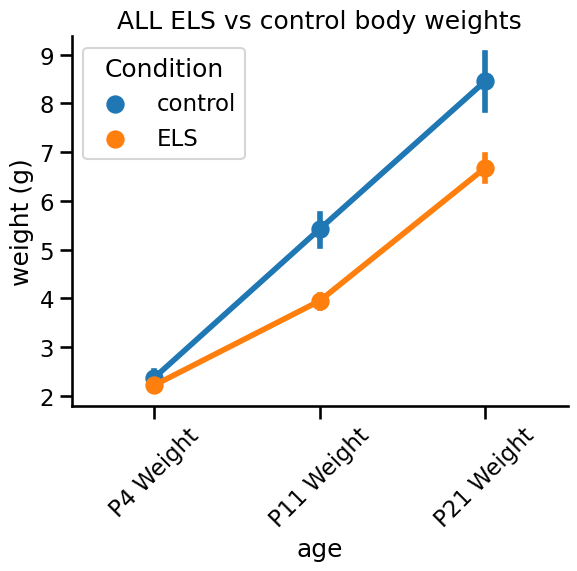

In [ ]:
g1 = sns.pointplot(data=df, x='age', y='weight (g)', hue='Condition')
plt.setp(g1.get_xticklabels(), rotation=45)
plt.title('ALL ELS vs control body weights')
sns.despine()
plt.savefig(save_dir.joinpath('ALL ELS vs control body weights'), dpi=300,
           bbox_inches='tight')


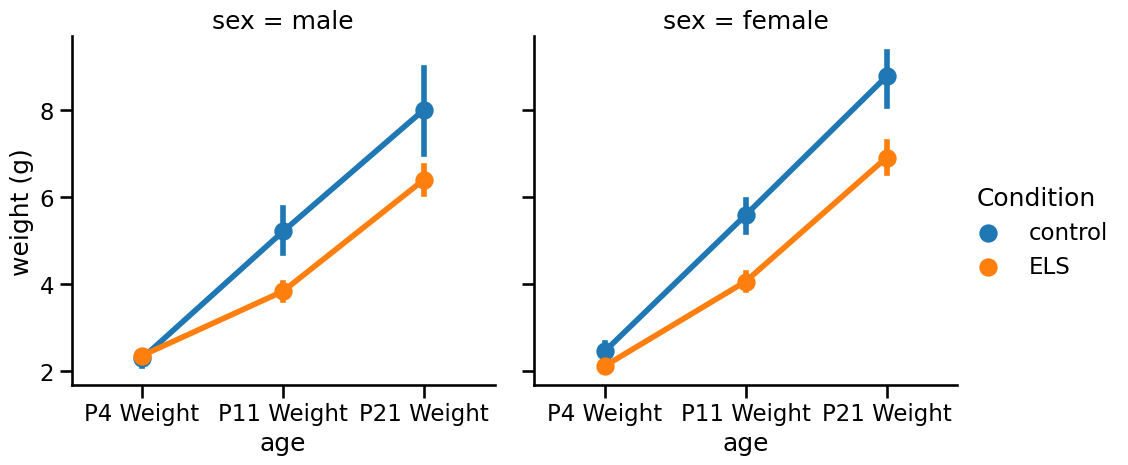

In [ ]:
g2 = sns.catplot(data=df, x='age', y='weight (g)', kind='point',
            hue='Condition', col='sex')
g2.savefig(save_dir.joinpath('ALL mice male vs female body weights'), dpi=300,
           bbox_inches='tight')

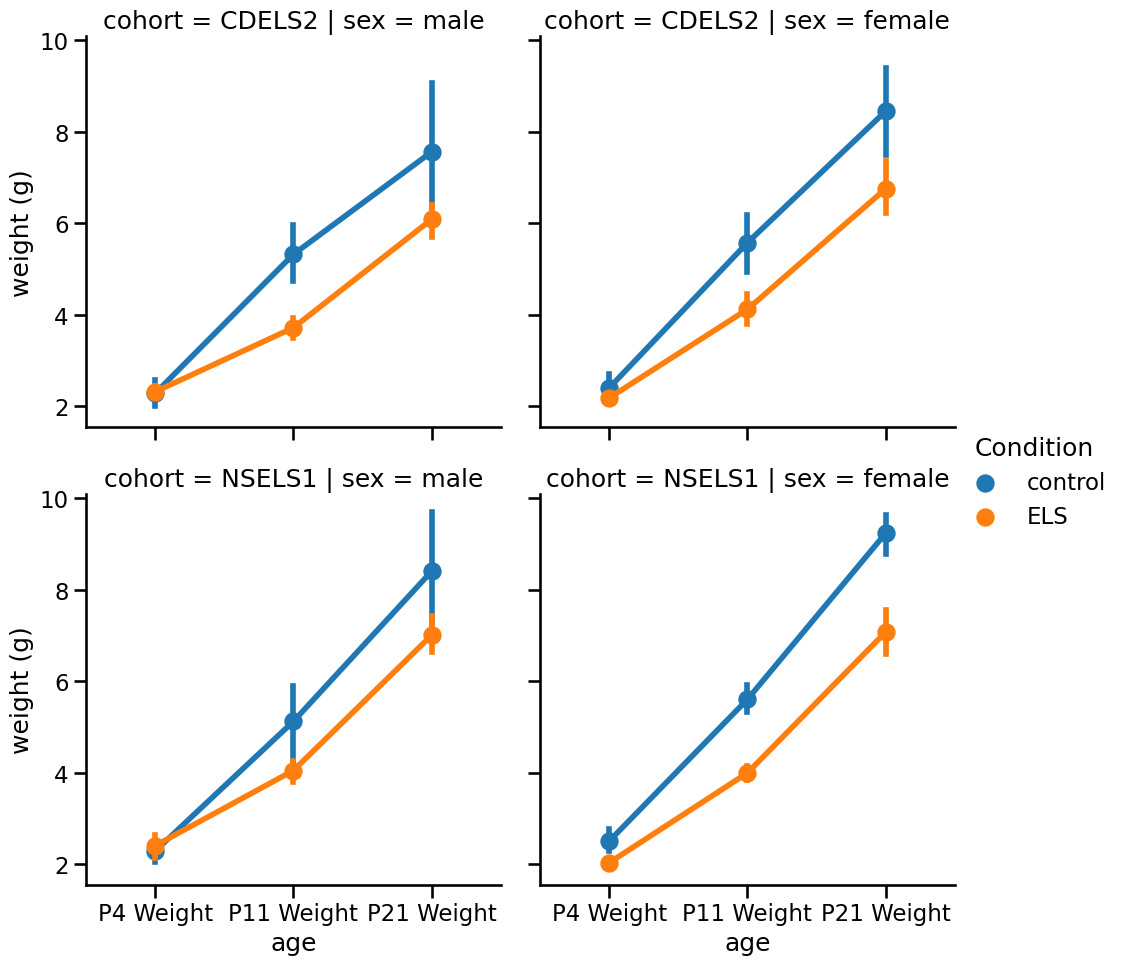

In [ ]:
g3 = sns.catplot(data=df, x='age', y='weight (g)', kind='point',
            hue='Condition', col='sex', row='cohort')
g3.savefig(save_dir.joinpath('ELS1 vs ELS2 mice male vs female body weights'), dpi=300,
           bbox_inches='tight')